In [19]:
#Import Tools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Gives adjacency dictionary (not mine)
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# Gives duplicate items in a list (not mine)
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )


#(https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/)
def merge(list1, list2):
      
    merged_list = []
    for i in range(max((len(list1), len(list2)))):
  
        while True:
            try:
                tup = (list1[i], list2[i])
            except IndexError:
                if len(list1) > len(list2):
                    list2.append('')
                    tup = (list1[i], list2[i])
                elif len(list1) < len(list2):
                    list1.append('')
                    tup = (list1[i], list2[i])
                continue
  
            merged_list.append(tup)
            break
    return merged_list

# def neighbors_in_radius(G, radius):
#     adj = np.array(nx.linalg.graphmatrix.adjacency_matrix(G).todense()).astype(float)  # much faster as float
#     power_adj = connected = adj
#     for i in range(radius - 1):
#         power_adj = power_adj.dot(adj)
#         connected = connected + power_adj
#     connected = connected.astype(bool).astype(int)
#     return connected

# function to check whether the list is empty or not
def is_list_empty(list):
    # checking the length
    if len(list) == 0:
        # returning true as length is 0
        return True
    # returning false as length is greater than 0
    return False

In [21]:
#Create dummy data
# 8:{"location":(0,0),"tag":"WO6","building":"BK","size":2,"type":"W2"}
# 1:{"location":(0,0),"tag":"V1","building":"BK","size":3,"structure":3,"solar":1}

vacant_spaces = {
"V1":{"location":(0,1),"tag":"V1","building":"BK","size":3,"structure":3,"solar":1, "node_type":"vacant"}, 
"V2":{"location":(10,2),"tag":"V2","building":"BK","size":3,"structure":3,"solar":2, "node_type":"vacant"},
"V3":{"location":(2,7),"tag":"V3","building":"BK","size":3,"structure":3,"solar":2, "node_type":"vacant"},
"V4":{"location":(4,8),"tag":"V4","building":"BK","size":3,"structure":1,"solar":3, "node_type":"vacant"},
"V5":{"location":(2,3),"tag":"V5","building":"BK","size":1,"structure":1,"solar":3, "node_type":"vacant"},
"V6":{"location":(4,4),"tag":"V6","building":"BK","size":2,"structure":2,"solar":1, "node_type":"vacant"}}

wastes = {
"WO1":{"location":(0,0),"tag":"WO1","building":"BK","size":3,"type":"W1", "node_type":"waste"}, 
"WO2":{"location":(8,1),"tag":"WO2","building":"BK","size":3,"type":"W6", "node_type":"waste"},
"WO3":{"location":(1,7),"tag":"WO3","building":"BK","size":1,"type":"W2", "node_type":"waste"},
"WO4":{"location":(2,6),"tag":"WO4","building":"BK","size":3,"type":"W2", "node_type":"waste"},
"WO5":{"location":(4,5),"tag":"WO5","building":"BK","size":3,"type":"W7", "node_type":"waste"},
"WO6":{"location":(3,2),"tag":"WO6","building":"BK","size":1,"type":"W5", "node_type":"waste"},
"WO7":{"location":(2,4),"tag":"WO7","building":"BK","size":2,"type":"W5", "node_type":"waste"},
"WO8":{"location":(10,3),"tag":"WO8","building":"BK","size":3,"type":"W7", "node_type":"waste"},
"WO9":{"location":(10,1),"tag":"WO9","building":"BK","size":3,"type":"W7", "node_type":"waste"},
"WO10":{"location":(4,5),"tag":"WO10","building":"BK","size":3,"type":"W2", "node_type":"waste"},
"WO11":{"location":(4,5),"tag":"WO11","building":"BK","size":3,"type":"W3", "node_type":"waste"},
"WO12":{"location":(4,5),"tag":"WO12","building":"BK","size":3,"type":"W6", "node_type":"waste"}}

nearby_space = (("V1","V2"),("V1","V3"),("V6","V3"),("V2","V3"))
nearby_waste50 = (("V1","WO5"),("V2","WO8"))
nearby_waste100 = [("V1","WO5"),("V1","WO6"),("V1","WO7"),("V1","WO3"),("V1","WO8"),("V2","WO5"),("V2","WO6"),("V2","WO8"),("V2","WO9"),("V2","WO8"),("V2","WO2"),("V4","WO8"),("V4","WO9"),("V1","WO2"),("V3","WO1"),("V3","WO10"),("V3","WO11"),("V3","WO12"),("V6","WO9")]

In [22]:
#Dictionary of urban farming systems
    # UF1: Vermiculture, UF2: Aquaculture, UF3: Mushroom, UF4: NFT, UF5: Medai Beds, UF6: Raised Beds, UF7: Water Culture, UF8: Plant Factory, UF9: Aeroponics
    # "S" : supplementary system, "F" : food production system
    # 3 : high, 2 : medium, 1 : low, 0 : none
uf_systems = {
"UF1":{"tag":"UF1","type":"S","weight":3,"solar":1,"in":["W1","W2","W3","W6"],"supplement":None,"out":["S4","S5"]},
"UF2":{"tag":"UF2","type":"SF","weight":3,"solar":2,"in":["W7"],"supplement":["S5"],"out":["O4","S2"]},
"UF3":{"tag":"UF3","type":"F","weight":2,"solar":1,"in":["W2","W3","W4","W6"],"supplement":None,"out":["O3","S4"]},
"UF4":{"tag":"UF4","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF5":{"tag":"UF5","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","O2","W1"]},
"UF6":{"tag":"UF6","type":"F","weight":3,"solar":3,"in":["W6"],"supplement":["S4"],"out":["O1","O2","W1"]},
"UF7":{"tag":"UF7","type":"F","weight":3,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF8":{"tag":"UF8","type":"F","weight":3,"solar":1,"in":["W5","W6"],"supplement":["S2"],"out":["O1","W1","W7"]},
"UF9":{"tag":"UF9","type":"F","weight":1,"solar":3,"in":["W5","W6"],"supplement":["S2"],"out":["O1","W1"]}
}

critical_items=["W1","W2","W3", "W4"]
non_critical_items=["W5","W6","W7"]

In [23]:
#Make a dictionary of vacant spaces and potential uf systems
v_potential = {}
for k,v in vacant_spaces.items():
    uf_list=[]
    for j,y in uf_systems.items():
        if (vacant_spaces[k]["structure"])>=(uf_systems[j]["weight"]) and (vacant_spaces[k]["solar"])==(uf_systems[j]["solar"]) and (uf_systems[j]["type"]=="F"):
            v_potential[k]={}
            uf_list.append(uf_systems[j]["tag"])
            v_potential[k]["tag"]=vacant_spaces[k]["tag"]
            v_potential[k]["UF"]=uf_list
print(v_potential)

{'V1': {'tag': 'V1', 'UF': ['UF3', 'UF8']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF9']}, 'V5': {'tag': 'V5', 'UF': ['UF4', 'UF5', 'UF9']}, 'V6': {'tag': 'V6', 'UF': ['UF3']}}


In [24]:
#remove co2,heat,water sources in waste50 from waste100 (w5,w6,w7)
for couple50 in nearby_waste50:
    for couple100 in nearby_waste100:
        for item50 in couple50:
            if item50 in couple100:
                if item50 in wastes:
                    if (wastes[item50]["type"]=="W5") or (wastes[item50]["type"]=="W6") or (wastes[item50]["type"]=="W7"):
                        nearby_waste100.remove(couple100)
nearby_waste100=tuple(nearby_waste100)     

{'V1': ['WO6', 'WO7', 'WO3', 'WO2'], 'V2': ['WO6', 'WO9', 'WO2'], 'V3': ['WO1', 'WO10', 'WO11', 'WO12'], 'V4': ['WO9'], 'V5': [], 'V6': ['WO9']}


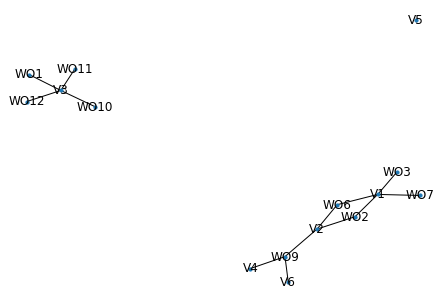

In [25]:
#Draw graph from "vacant_spaces" and "waste" nodes with the given nearby nodes
# nodes_dict={}
# for i in wastes:
#     nodes_dict[i]=wastes[i]["location"]
# for i in vacant_spaces:
#     nodes_dict[i]=vacant_spaces[i]["location"]

# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i,j in vacant_spaces.items():
    G.add_node(i)
G.add_edges_from(nearby_waste100)
nx.draw(G, with_labels=True, node_size=10)
# nx.draw_networkx(G,nodes_dict)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict = create_edge_dict(G)
waste_dict = {}
for i,k in new_waste_dict.items():
    new_list = []
    if i in vacant_spaces:
        waste_dict[i]=k
print (waste_dict)

In [26]:
# For each vacant space find wastes within radius=1

# new_list=[]
# for nodes in G.nodes():
#     for i,j in vacant_spaces.items():
#         if nodes == vacant_spaces[i]["tag"]:
#             new_list.append(nodes)
# print(new_list)
# for i in new_list:
#     # print(i, "is i")
#     G_close = nx.ego_graph(G,i,radius=1)
#     nx.draw(G_close, with_labels=True, node_size=2)
#     edge_dictionary=create_edge_dict(G_close)

# G_close = nx.ego_graph(G,"V1",radius=1)
# nx.draw(G_close, with_labels=True, node_size=2)
# G_close.edges("V1")

# waste_nearby={}
# for m,n in vacant_spaces.items():
#     for i,k in edge_dictionary.items():
#         if i!=vacant_spaces[m]["tag"]:
#             print(i, "is not vacant space")
#         else:
#             waste_nearby[i]=k
#             # print(i, "is vacant space")
            
# ###### include waste types!!!!!!

# print(waste_nearby)

In [27]:
#List of dictionaries we will use:
print(v_potential)
print(waste_dict)
print(uf_systems)

{'V1': {'tag': 'V1', 'UF': ['UF3', 'UF8']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF9']}, 'V5': {'tag': 'V5', 'UF': ['UF4', 'UF5', 'UF9']}, 'V6': {'tag': 'V6', 'UF': ['UF3']}}
{'V1': ['WO6', 'WO7', 'WO3', 'WO2'], 'V2': ['WO6', 'WO9', 'WO2'], 'V3': ['WO1', 'WO10', 'WO11', 'WO12'], 'V4': ['WO9'], 'V5': [], 'V6': ['WO9']}
{'UF1': {'tag': 'UF1', 'type': 'S', 'weight': 3, 'solar': 1, 'in': ['W1', 'W2', 'W3', 'W6'], 'supplement': None, 'out': ['S4', 'S5']}, 'UF2': {'tag': 'UF2', 'type': 'SF', 'weight': 3, 'solar': 2, 'in': ['W7'], 'supplement': ['S5'], 'out': ['O4', 'S2']}, 'UF3': {'tag': 'UF3', 'type': 'F', 'weight': 2, 'solar': 1, 'in': ['W2', 'W3', 'W4', 'W6'], 'supplement': None, 'out': ['O3', 'S4']}, 'UF4': {'tag': 'UF4', 'type': 'F', 'weight': 1, 'solar': 3, 'in': ['W5', 'W6', 'W7'], 'supplement': ['S2'], 'out': ['O1', 'W1']}, 'UF5': {'tag': 'UF5', 'type': 'F', 'weight': 1, 'solar': 3, 'in': ['W5', 'W6', 'W7'], 'supplement': ['S2'], 'out': ['O1', 'O2', 'W1']}, 'UF6': {'tag': 'UF6',

In [28]:
# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict={}

for i,k in v_potential.items():
    v_potential_dict[i]={}
    potential_systems = v_potential[i]["UF"]
    for item in potential_systems:
       v_potential_dict[i][item] = uf_systems[item]["in"]
       
print(v_potential_dict)    

{'V1': {'UF3': ['W2', 'W3', 'W4', 'W6'], 'UF8': ['W5', 'W6']}, 'V4': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6']}, 'V5': {'UF4': ['W5', 'W6', 'W7'], 'UF5': ['W5', 'W6', 'W7'], 'UF9': ['W5', 'W6']}, 'V6': {'UF3': ['W2', 'W3', 'W4', 'W6']}}


#Design Rule 1.0 : Waste Availability
    #if there are more than 2 found items assign that system to that vacant space

Design Rule 2: Introduction of Quantity
    if vacant space size = waste quantity

Design Rule 3.0 : Sharing Existing Resources
   ~ to be developed 
    

In [29]:
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    # print(i, "is space")
    for system,demanded in k.items():
        # print(system, demanded)
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        found_dict[i][system]["source"]={}
        # found_dict[i][system]["missing"]={}
        # print("for",system,demanded,"is needed")
        found=[]
        source=[]
        for waste in waste_dict[i]:
            for each in demanded: 
                available = wastes[waste]["type"]
                source2 = wastes[waste]["tag"]
                # print(source)
                source_size = wastes[waste]["size"]
                #print("for",system, "in",i, demanded, "is needed",available, "is available")
                if each == available:
                    # print ("found",each)
                    found.append(available)
                    source.append(source2)
                    found_dict[i][system]["found"]=found
                    found_dict[i][system]["source"]=source
                # else:
                #     
                #     missing.append(each)
                #     found_dict[i][system]["missing"]=missing

#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

##remove repeating items
# for i,k in found_dict.items():
#     for system in k:
#         found_items = found_dict[i][system]["found"]
#         duplicate=list_duplicates(found_items)
#         for found in found_items:
#             if found in duplicate:
#                 found_items.remove(found)

#reach sizes of duplicate items
for i,k in found_dict.items():
    for system in k:
        found_items=found_dict[i][system]["found"]
        
print (found_dict["V1"]["UF8"]["source"])
print (found_dict)

['WO6', 'WO7', 'WO2']
{'V1': {'UF3': {'found': ['W2', 'W6'], 'source': ['WO3', 'WO2'], 'missing': ['W3', 'W4']}, 'UF8': {'found': ['W5', 'W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': []}}, 'V4': {'UF4': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6']}, 'UF5': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6']}}}


In [30]:
#make a duplicate of found dict with sorted systems

In [31]:
# apply design rule 3.1
# if v_size == w_size+w_size+w_size add to found & remove from wastes list

# duplicate_items={}
# for space,potential in found_dict.items():
#     duplicate_items[space]={}
#     # print(potential)
#     for system, k in potential.items():
#         if len(found_dict[space][system]["found"])> 1:
#             found_items3=found_dict[space][system]["found"]
#             # print(found_dict[space][system]["source"])
#             # print(found_items3)
#             sources=[]
#             for index,items in enumerate(found_items3):
#                 # print(index,items)
#                 count=found_items3.count(items)
#                 # print(count)
#                 if count>1:
#                     items_str=str(items)
#                     sources.append(found_dict[space][system]["source"][index])
    
#             duplicate_items[space]["matching sources"]=sources

            
#                     # if sum(wastes[sources]["size"])== vacant_spaces[space]["size"]:
# print(sources)
# print(duplicate_items)


In [32]:
#Make a dictionary holding each vacant space& found and repeating waste type & waste sources corresponding to found items
duplicate_items={}
for space,potential in found_dict.items():
    
    duplicate_items[space]={}
    # print(potential)
    for system, k in potential.items():
        
        if len(found_dict[space][system]["found"])> 1:
            found_items3=found_dict[space][system]["found"]
            # print(found_dict[space][system]["source"])
            sources=[]
            for index,items in enumerate(found_items3):
                # print(index,items)
                duplicate_items[space][items]={}
                count=found_items3.count(items)
                # print(found_items3,space,item,count)
                
                if count>1:
                    items_str=str(items)
                    sources.append(found_dict[space][system]["source"][index])
                    duplicate_items[space][items]["matching sources"]=sources

print(duplicate_items)

{'V1': {'W2': {}, 'W6': {}, 'W5': {'matching sources': ['WO6', 'WO7']}}, 'V4': {}, 'V5': {}, 'V6': {}}


In [33]:
#check if the total size of found waste matches the vacant space size
print(duplicate_items)  
satisfying_duplicate={}
for space, k in duplicate_items.items():
    satisfying_duplicate[space]={}
    for key,value in k.items():
        satisfying_duplicate[space][key]={}
        waste_matched=[]
        not_matched=[]
        if duplicate_items[space][key]!=[]:
            for m,n in duplicate_items[space][key].items():
                matched=duplicate_items[space][key][m]
                for items in matched:
                    found_new=[]
                    waste_matched.append(wastes[items]["size"])
                    if sum(waste_matched)==vacant_spaces[space]["size"]:
                        print(space, waste_matched, "add to found list and remove from missing")
                        found_new=matched
                        print(found_new, "is found")

                    else:
                        print(sum(waste_matched),"And",vacant_spaces[space]["size"],items)
                        not_matched=items
                        print(not_matched,"is not matched")
                satisfying_duplicate[space][key]=found_new
                            
print(satisfying_duplicate) 


{'V1': {'W2': {}, 'W6': {}, 'W5': {'matching sources': ['WO6', 'WO7']}}, 'V4': {}, 'V5': {}, 'V6': {}}
1 And 3 WO6
WO6 is not matched
V1 [1, 2] add to found list and remove from missing
['WO6', 'WO7'] is found
{'V1': {'W2': {}, 'W6': {}, 'W5': ['WO6', 'WO7']}, 'V4': {}, 'V5': {}, 'V6': {}}


In [34]:
#remove duplicate items if they are also in satisfying_duplicate items list
for space,potential in found_dict.items():
    for system in potential.keys():
        # print(found_dict[space][system]["found"])
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                        if len(found_dict[space][system]["found"])>0:
                        # print(satisfying_duplicate[key][waste])
                            if len(satisfying_duplicate[key][waste])>0:
                                if waste in found_dict[space][system]["found"]:
                                    type(satisfying_duplicate[key][waste])
                                    print(waste,satisfying_duplicate[key][waste],"is found")
                                    print(space,waste,"is found")
                                    found_items = found_dict[space][system]["found"]
                                    duplicate=list_duplicates(found_items)
                                    for found in found_items:
                                        if found in duplicate:
                                            found_items.remove(found)
                                        # else:
                                        #     print("oopsie") 
                                        #     break                                                   
print(found_dict)

W5 ['WO6', 'WO7'] is found
V1 W5 is found
{'V1': {'UF3': {'found': ['W2', 'W6'], 'source': ['WO3', 'WO2'], 'missing': ['W3', 'W4']}, 'UF8': {'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': []}}, 'V4': {'UF4': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6']}, 'UF5': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6']}}}


In [35]:
#remove duplicate items if they are not in satisfying_duplicate items list

for space in found_dict.keys():
    for system in found_dict[space].keys():
        found_items = found_dict[space][system]["found"]
        missing_items = found_dict[space][system]["missing"]
        duplicate=list_duplicates(found_items)
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                    for found in found_items:
                        if found in duplicate:
                            print("duplicate",space,found,system)
                            if satisfying_duplicate[space][found]==[]:
                                print("duplicate not satisfying",space,found,system)
                                missing_items.append(found)
                                found_items.remove(found) 
#put not satisfying waste sources in a list
not_enough_waste=[]
for space in found_dict:
    for system in found_dict[space]:
        source=found_dict[space][system]["source"]
        for index in range(len(source)):
            # print(source,index,source[index])
            item=source[index]
            waste=wastes[item]["type"]
            if waste in found_dict[space][system]["found"]:
                print("yas")
            else:
                not_enough_waste.append(item) 
#remove the items in that list from found dict sources
for space in found_dict:
    for system in found_dict[space]:    
        source=found_dict[space][system]["source"]
        for item in not_enough_waste:
            if item in source:
                source.remove(item)                    #  
            
#remove duplicate items in missing list
for space in found_dict.keys():
    for system in found_dict[space].keys():
       missing_items2 = found_dict[space][system]["missing"]   
       duplicate=list_duplicates(missing_items2)
       for missing in missing_items2:
           if missing in duplicate:
               missing_items2.remove(missing) 

print(found_dict)     
print(not_enough_waste)
   

yas
yas
yas
yas
yas
yas
yas
{'V1': {'UF3': {'found': ['W2', 'W6'], 'source': ['WO3', 'WO2'], 'missing': ['W3', 'W4']}, 'UF8': {'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': []}}, 'V4': {'UF4': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6']}, 'UF5': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6']}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6']}}}
[]


In [36]:
#add circularity percentage to found_dict
for space in found_dict:
    for system in found_dict[space]:
        found_dict[space][system]["circularity"]=[]
        found=len(found_dict[space][system]["found"])
        missing=len(found_dict[space][system]["missing"])
        total=found+missing
        found_dict[space][system]["circularity"]=found/total
print(found_dict)   

{'V1': {'UF3': {'found': ['W2', 'W6'], 'source': ['WO3', 'WO2'], 'missing': ['W3', 'W4'], 'circularity': 0.5}, 'UF8': {'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': [], 'circularity': 1.0}}, 'V4': {'UF4': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6'], 'circularity': 0.3333333333333333}, 'UF5': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6'], 'circularity': 0.3333333333333333}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6'], 'circularity': 0.0}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6'], 'circularity': 0.0}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6'], 'circularity': 0.0}}}


In [37]:
#make a duplicate of found dict, sort system based on circularities
sorted_dict={}
for space in found_dict:
    system=sorted(found_dict[space], key=lambda x: (found_dict[space][x]['circularity']), reverse=True)  
    sorted_dict[space]={} 
    for item in system:
        # print(item,"is item",space)
        values={}
        values=(found_dict[space][item])
        # print(space, item,"is item", values)
        sorted_dict[space][item]=values

print(sorted_dict)

{'V1': {'UF8': {'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': [], 'circularity': 1.0}, 'UF3': {'found': ['W2', 'W6'], 'source': ['WO3', 'WO2'], 'missing': ['W3', 'W4'], 'circularity': 0.5}}, 'V4': {'UF4': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6'], 'circularity': 0.3333333333333333}, 'UF5': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6'], 'circularity': 0.3333333333333333}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6'], 'circularity': 0.0}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6'], 'circularity': 0.0}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6'], 'circularity': 0.0}}}


In [38]:
occupied={}
used_waste=[]
used_waste_source=[]
used_waste_source_temp=[]
new_edges=[]
occupied_dict={}

for space in sorted_dict:
    print("looking for", space)
    print("for",space,sorted_dict[space],"is possible")
    occupied_dict[space]={}
    occupied_dict[space]["system"]={}
    occupied_dict[space]["found"]={}
    occupied_dict[space]["source"]={}
    occupied_dict[space]["missing"]={}
    for index,system in enumerate(sorted_dict[space]):
        print("looking for system", system)
        occupied[space]={}
        occupied[space]["system"]={}
        found_list=sorted_dict[space][system]["found"]
        sources_list=sorted_dict[space][system]["source"]
        missing_list=sorted_dict[space][system]["missing"]
        print(len(missing_list),"is length for",space,system)

        if len(occupied[space]["system"])==0:
            print(space,"is not occupied run for",system)
            if len(missing_list)==0:    
                for source in sources_list:
                    if source in used_waste_source:
                        print(used_waste_source,"is used",space,system)
                        pass
                    elif source not in used_waste_source:
                        print(used_waste_source,"is used",space,system)
                        occupied[space]["system"]=system
                        occupied_dict[space]["system"]=system
                        occupied_dict[space]["found"]=sorted_dict[space][system]["found"]
                        occupied_dict[space]["source"]=sorted_dict[space][system]["source"]
                        for items in found_list:
                            used_waste.append(items)
                        used_waste_source.append(source)
                        edge_tuple=(source,space)
                        new_edges.append(edge_tuple)
                        print("no missing items:", space, system, "assign")
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break
        
        if len(occupied[space]["system"])==0:
            if len(missing_list)==1:
                print("one item",system,space)
                for missing in missing_list:
                    if missing in non_critical_items:
                        for source in sources_list:
                            if source not in used_waste_source:
                                print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict[space][system]["found"]
                                occupied_dict[space]["source"]=sorted_dict[space][system]["source"]
                                occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                                print("one non critical missing items:", space, system, "assign")
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break

        if occupied[space]["system"]==0 :  
            if len(missing_list)==2:
                for missing in missing_list:
                    if missing in non_critical_items:
                        for source in sources_list:
                            if source not in used_waste_source:
                                print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict[space][system]["found"]
                                occupied_dict[space]["source"]=sorted_dict[space][system]["source"]
                                occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                print("two non critical missing items:", space, system)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break  

looking for V1
for V1 {'UF8': {'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': [], 'circularity': 1.0}, 'UF3': {'found': ['W2', 'W6'], 'source': ['WO3', 'WO2'], 'missing': ['W3', 'W4'], 'circularity': 0.5}} is possible
looking for system UF8
0 is length for V1 UF8
V1 is not occupied run for UF8
[] is used V1 UF8
no missing items: V1 UF8 assign
['WO6'] is used V1 UF8
no missing items: V1 UF8 assign
['WO6', 'WO7'] is used V1 UF8
no missing items: V1 UF8 assign
V1 UF8 will break
looking for V4
for V4 {'UF4': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6'], 'circularity': 0.3333333333333333}, 'UF5': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6'], 'circularity': 0.3333333333333333}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6'], 'circularity': 0.0}} is possible
looking for system UF4
2 is length for V4 UF4
V4 is not occupied run for UF4
looking for system UF5
2 is length for V4 UF5
V4 is not occupied run for UF5
looking for system U

In [39]:
# print(occupied)  

print(used_waste_source) 
# print(new_edges)
  
print(occupied_dict)

['WO6', 'WO7', 'WO2']
{'V1': {'system': 'UF8', 'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': {}}, 'V4': {'system': {}, 'found': {}, 'source': {}, 'missing': {}}, 'V5': {'system': {}, 'found': {}, 'source': {}, 'missing': {}}, 'V6': {'system': {}, 'found': {}, 'source': {}, 'missing': {}}}


In [40]:
#add circularity & outputs to occupied_dict
for space in occupied_dict:
    occupied_dict[space]["circularity"]={}
    occupied_dict[space]["outputs"]={}
    occupied_dict[space]["supplements"]={}
    if len(occupied_dict[space]["system"])!=0:
        system=occupied_dict[space]["system"]
        outputs=(uf_systems[system]["out"])
        supplements=uf_systems[system]["supplement"]
        occupied_dict[space]["circularity"]=found_dict[space][system]["circularity"]
        occupied_dict[space]["supplements"]=supplements
        occupied_dict[space]["outputs"]=outputs
print(occupied_dict)

{'V1': {'system': 'UF8', 'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': {}, 'circularity': 1.0, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V4': {'system': {}, 'found': {}, 'source': {}, 'missing': {}, 'circularity': {}, 'outputs': {}, 'supplements': {}}, 'V5': {'system': {}, 'found': {}, 'source': {}, 'missing': {}, 'circularity': {}, 'outputs': {}, 'supplements': {}}, 'V6': {'system': {}, 'found': {}, 'source': {}, 'missing': {}, 'circularity': {}, 'outputs': {}, 'supplements': {}}}


In [41]:
#remove empty spaces from occupied_dict
remove=[]
for space in occupied_dict:
    if len(occupied_dict[space]["system"])==0:
        remove.append(space)
for items in remove:
    occupied_dict.pop(items)
print("occupied",occupied_dict)

#remove assigned spaces from found_dict
remove2=[]
for space in sorted_dict:
    if space in occupied_dict:
        # print(space)
        remove2.append(space)
# print(remove2)
for items in remove2:
    sorted_dict.pop(items)
print("non occupied",sorted_dict)

occupied {'V1': {'system': 'UF8', 'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': {}, 'circularity': 1.0, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}}
non occupied {'V4': {'UF4': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6'], 'circularity': 0.3333333333333333}, 'UF5': {'found': ['W7'], 'source': ['WO9'], 'missing': ['W5', 'W6'], 'circularity': 0.3333333333333333}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6'], 'circularity': 0.0}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6'], 'circularity': 0.0}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6'], 'circularity': 0.0}}}


In [42]:
#look for a system that can supply needed supplement
#put the findings in a dictionary
v_supplement_fs={}
for space in occupied_dict:
    v_supplement_fs[space]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["fs_system"]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["supplement source"]={}
    v_supplement_fs[space]["fs_demand"]={}
    v_supplement_fs[space]["fs_demand source"]={}
    v_supplement_fs[space]["potential source"]={}
    supplement=occupied_dict[space]["supplements"]
    # print(supplement)
    if supplement!=None:
        for item in supplement:
            if item=="S2":
                for i in uf_systems:
                    out=uf_systems[i]["out"]
                    for input in uf_systems[i]["in"]:
                        if "S2" in out:
                            print("maybe",space, i)
                            v_supplement_fs[space]["fs_system"]=i
                            v_supplement_fs[space]["supplement"]=item
                            v_supplement_fs[space]["fs_demand"]=input
    else:
        v_supplement_fs[space]["fs_system"]=None
print(v_supplement_fs)

maybe V1 UF2
{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': 'W7', 'fs_demand source': {}, 'potential source': {}}}


In [43]:
#created a dictionary for spaces which need supplement to store system, supplementing neighbor and supplement type
#for each space found what kind of system and supplement and input is necessary 
print(v_supplement_fs)

#look neighbors of supplement needing space to see if there is a potential neighbor
for space in v_supplement_fs:
    potential=[]
    for space2,neighbor in nearby_space:
        if space==space2:
            if len(v_supplement_fs[space]["supplement source"])==0:
                print(neighbor,"is available")
                system=v_supplement_fs[space]["fs_system"]
                if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                    potential.append(neighbor)
                    print(space,potential)
                    v_supplement_fs[space]["potential source"]=potential
print(v_supplement_fs)


{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': 'W7', 'fs_demand source': {}, 'potential source': {}}}
V2 is available
V1 ['V2']
V3 is available
V1 ['V2', 'V3']
{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': 'W7', 'fs_demand source': {}, 'potential source': ['V2', 'V3']}}


In [44]:
#check if potential sources have fs_demand
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        # print(vacant,len(v_supplement_fs[space]["supplement source"]),"---",v_supplement_fs[space]["supplement source"])
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    print(nearby,"not used")
                    if v_supplement_fs[space]["fs_demand"]==wastes[nearby]["type"]:
                        print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                        v_supplement_fs[space]["supplement source"]=vacant
                        print(v_supplement_fs[space]["supplement source"])
                        v_supplement_fs[space]["fs_demand source"]=nearby
                        print(v_supplement_fs[space]["fs_demand source"])
                        used_waste_source.append(nearby)
                        edge_tuple1=(nearby,vacant)
                        edge_tuple2=(vacant,space)
                        new_edges.append(edge_tuple1)
                        new_edges.append(edge_tuple2)
                        if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break")        
                            break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
print(v_supplement_fs)  
print(used_waste_source) 
print(new_edges)     

V2 WO6 is W5
V2 WO9 is W7
WO9 not used
for V1 V2 is potential and has WO9 as a source of W7
V2
WO9
{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': 'V2', 'fs_demand': 'W7', 'fs_demand source': 'WO9', 'potential source': ['V2', 'V3']}}
['WO6', 'WO7', 'WO2', 'WO9']
[('WO6', 'V1'), ('WO7', 'V1'), ('WO2', 'V1'), ('WO9', 'V2'), ('V2', 'V1')]


In [45]:
print(occupied_dict)
for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        print("work")
        occ=v_supplement_fs[space]["supplement source"]
        occupied_dict[occ]={}
        print(occupied_dict)
        occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
        occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
        occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
print(occupied_dict)

{'V1': {'system': 'UF8', 'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': {}, 'circularity': 1.0, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}}
work
{'V1': {'system': 'UF8', 'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': {}, 'circularity': 1.0, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {}}
{'V1': {'system': 'UF8', 'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': {}, 'circularity': 1.0, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO9'}}


In [46]:
#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]
    


print(network_dict)

{'WO6': {'type': 'W5', 'size': 1, 'receiver': 'V1'}, 'WO7': {'type': 'W5', 'size': 2, 'receiver': 'V1'}, 'WO2': {'type': 'W6', 'size': 3, 'receiver': 'V1'}, 'WO9': {'type': 'W7', 'size': 3, 'receiver': 'V2'}, 'V2': {'type': 'W7', 'size': 3, 'receiver': 'V1'}}


In [47]:
print(v_supplement_fs)

{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': 'V2', 'fs_demand': 'W7', 'fs_demand source': 'WO9', 'potential source': ['V2', 'V3']}}


In [48]:
#now we have food supplying supplementary systems
#we still need to check if these systems need supplements
for space in occupied_dict: 
    system=occupied_dict[space]["system"]
    # print(system)
    # print(uf_systems[system]["supplement"])
    value=uf_systems[system]["supplement"]
    for supplement in value:
        if supplement=="S5":
            v_supplement_fs[space]={}
            v_supplement_fs[space]["supplement"]=supplement
            for uf in uf_systems:
                for out in uf_systems[uf]["out"]:
                    if supplement == out:
                        v_supplement_fs[space]["fs_system"]=uf
                        v_supplement_fs[space]["fs_demand"]=uf_systems[uf]["in"]
            v_supplement_fs[space]["supplement source"]={}
            v_supplement_fs[space]["fs_demand source"]={}
            v_supplement_fs[space]["potential source"]={}
print(v_supplement_fs)

{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': 'V2', 'fs_demand': 'W7', 'fs_demand source': 'WO9', 'potential source': ['V2', 'V3']}, 'V2': {'supplement': 'S5', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': {}}}


In [49]:
for space in v_supplement_fs:
    potential=[]
    for space2,neighbor in nearby_space:
        if space==space2:
            if len(v_supplement_fs[space]["supplement source"])==0:
                print(neighbor,"is available")
                system=v_supplement_fs[space]["fs_system"]
                if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                    potential.append(neighbor)
                    print(space,potential)
                    v_supplement_fs[space]["potential source"]=potential
print(v_supplement_fs)

V3 is available
V2 ['V3']
{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': 'V2', 'fs_demand': 'W7', 'fs_demand source': 'WO9', 'potential source': ['V2', 'V3']}, 'V2': {'supplement': 'S5', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': {}, 'fs_demand source': {}, 'potential source': ['V3']}}


In [50]:
#check if potential sources have fs_demand
print(used_waste_source)
for space in v_supplement_fs:
    
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        print(vacant,len(v_supplement_fs[space]["supplement source"]),"---",v_supplement_fs[space]["supplement source"])
        for vacant in potential:
            found=[]
            found_source=[]
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    print(nearby,"not used")
                    found.append(wastes[nearby]["type"])
                    found_source.append(nearby)
                    print(found)
                    if v_supplement_fs[space]["fs_demand"]==found:
                        print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                        v_supplement_fs[space]["supplement source"]=vacant
                        print(v_supplement_fs[space]["supplement source"])
                        v_supplement_fs[space]["fs_demand source"]=found_source
                        print(v_supplement_fs[space]["fs_demand source"])
                        for x in found_source:
                            used_waste_source.append(x)
                            edge_tuple1=(x,vacant)
                            new_edges.append(edge_tuple1)
                        edge_tuple2=(vacant,space)
                        
                        new_edges.append(edge_tuple2)
                        if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break")        
                            break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
print(v_supplement_fs) 
print(new_edges)
print(used_waste_source)

['WO6', 'WO7', 'WO2', 'WO9']
V2 0 --- {}
V3 WO1 is W1
WO1 not used
['W1']
V3 WO10 is W2
WO10 not used
['W1', 'W2']
V3 WO11 is W3
WO11 not used
['W1', 'W2', 'W3']
V3 WO12 is W6
WO12 not used
['W1', 'W2', 'W3', 'W6']
for V2 V3 is potential and has WO12 as a source of W6
V3
['WO1', 'WO10', 'WO11', 'WO12']
{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': 'V2', 'fs_demand': 'W7', 'fs_demand source': 'WO9', 'potential source': ['V2', 'V3']}, 'V2': {'supplement': 'S5', 'fs_system': 'UF1', 'fs_demand': ['W1', 'W2', 'W3', 'W6'], 'supplement source': 'V3', 'fs_demand source': ['WO1', 'WO10', 'WO11', 'WO12'], 'potential source': ['V3']}}
[('WO6', 'V1'), ('WO7', 'V1'), ('WO2', 'V1'), ('WO9', 'V2'), ('V2', 'V1'), ('WO1', 'V3'), ('WO10', 'V3'), ('WO11', 'V3'), ('WO12', 'V3'), ('V3', 'V2')]
['WO6', 'WO7', 'WO2', 'WO9', 'WO1', 'WO10', 'WO11', 'WO12']


In [51]:
print(occupied_dict)
for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        occ=v_supplement_fs[space]["supplement source"]
        occupied_dict[occ]={}
        occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
        occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
        occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
        occupied_dict[occ]["outputs"]=v_supplement_fs[space]["supplement"]
print(occupied_dict)

{'V1': {'system': 'UF8', 'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': {}, 'circularity': 1.0, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO9'}}
{'V1': {'system': 'UF8', 'found': ['W5', 'W6'], 'source': ['WO6', 'WO7', 'WO2'], 'missing': {}, 'circularity': 1.0, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO9', 'outputs': 'S2'}, 'V3': {'found': ['W1', 'W2', 'W3', 'W6'], 'system': 'UF1', 'source': ['WO1', 'WO10', 'WO11', 'WO12'], 'outputs': 'S5'}}


In [52]:
#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["outputs"]
    


print(network_dict)

{'WO6': {'type': 'W5', 'size': 1, 'receiver': 'V1'}, 'WO7': {'type': 'W5', 'size': 2, 'receiver': 'V1'}, 'WO2': {'type': 'W6', 'size': 3, 'receiver': 'V1'}, 'WO9': {'type': 'W7', 'size': 3, 'receiver': 'V2'}, 'V2': {'type': 'S2', 'size': 3, 'receiver': 'V1'}, 'WO1': {'type': 'W1', 'size': 3, 'receiver': 'V3'}, 'WO10': {'type': 'W2', 'size': 3, 'receiver': 'V3'}, 'WO11': {'type': 'W3', 'size': 3, 'receiver': 'V3'}, 'WO12': {'type': 'W6', 'size': 3, 'receiver': 'V3'}, 'V3': {'type': 'S5', 'size': 3, 'receiver': 'V2'}}
